In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest


In [2]:
data = pd.read_csv("motor_normal_data.csv")
print(data.head())
print("Dataset shape:", data.shape)


   temperature   humidity         gas   current  vibration
0    56.241785  56.996777  113.248217  3.800000   0.289555
1    54.654339  54.623168  118.554813  4.155846   0.347816
2    56.619221  50.298152  112.075801  4.334558   0.351261
3    58.807575  46.765316  116.920385  5.255075   0.383084
4    54.414617  53.491117  101.063853  4.722621   0.254320
Dataset shape: (1000, 5)


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

joblib.dump(scaler, "scaler.pkl")
print("Scaler saved")


Scaler saved


In [4]:
model = IsolationForest(
    n_estimators=200,
    contamination=0.03,
    random_state=42
)

model.fit(X_scaled)

joblib.dump(model, "motor_model.pkl")
print("Model trained and saved")


Model trained and saved


In [5]:
preds = model.predict(X_scaled)
scores = model.decision_function(X_scaled)

print("Anomalies detected in training data:", np.sum(preds == -1))


Anomalies detected in training data: 30


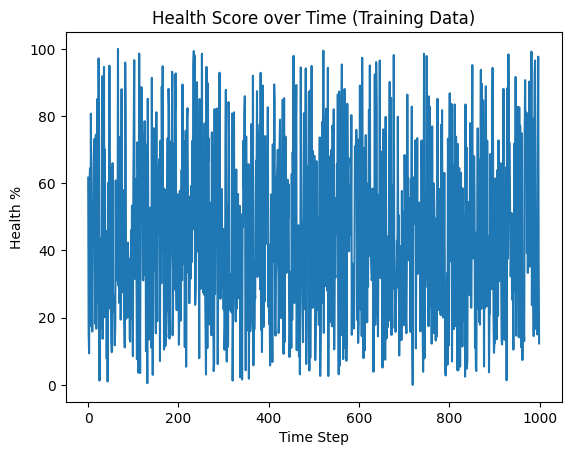

In [6]:
health_score = 100 - (np.abs(scores) / np.max(np.abs(scores))) * 100

plt.figure()
plt.plot(health_score)
plt.title("Health Score over Time (Training Data)")
plt.xlabel("Time Step")
plt.ylabel("Health %")
plt.show()


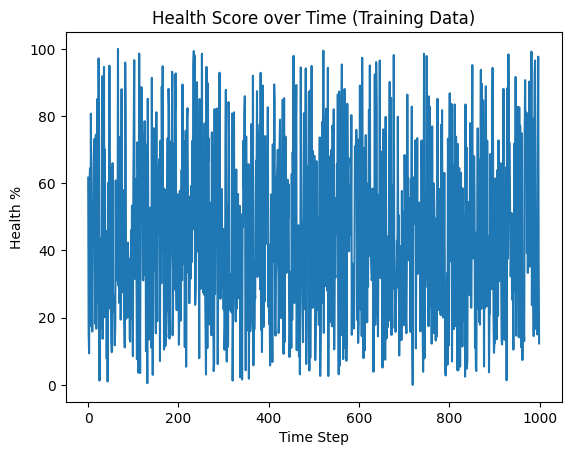

In [7]:
health_score = 100 - (np.abs(scores) / np.max(np.abs(scores))) * 100

plt.figure()
plt.plot(health_score)
plt.title("Health Score over Time (Training Data)")
plt.xlabel("Time Step")
plt.ylabel("Health %")
plt.show()


In [8]:
anomaly_data = data.copy()

# Inject stress patterns
anomaly_data.loc[900:, "temperature"] += 10
anomaly_data.loc[900:, "vibration"] += 0.5
anomaly_data.loc[900:, "current"] += 1.5

anomaly_scaled = scaler.transform(anomaly_data)


In [9]:
anomaly_preds = model.predict(anomaly_scaled)
anomaly_scores = model.decision_function(anomaly_scaled)

print("Anomalies detected:", np.sum(anomaly_preds == -1))


Anomalies detected: 127


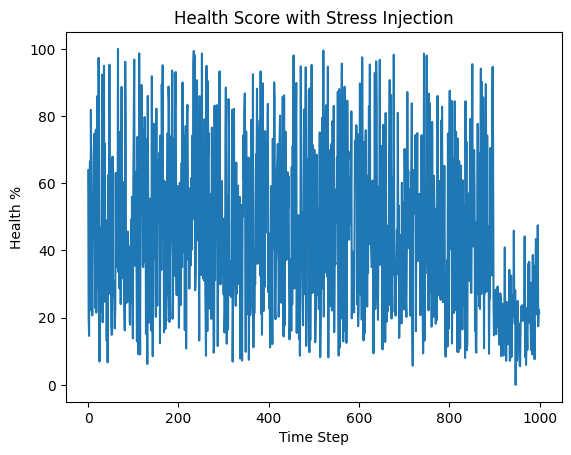

In [10]:
health_score_test = 100 - (np.abs(anomaly_scores) / np.max(np.abs(anomaly_scores))) * 100

plt.figure()
plt.plot(health_score_test)
plt.title("Health Score with Stress Injection")
plt.xlabel("Time Step")
plt.ylabel("Health %")
plt.show()
